# **Data Science Learners Hub**

**Module : SQL**

**Topic :** **WINDOW Functions in SQL**

**email** : [datasciencelearnershub@gmail.com](mailto:datasciencelearnershub@gmail.com)

## **# WINDOW Functions in SQL**

### 1. Create a simple table to illustrate examples for WINDOW Functions

In [1]:
-- Create a simple table
CREATE TABLE Sales (
    SalesID INT PRIMARY KEY,
    ProductName VARCHAR(50),
    SaleDate DATE,
    Quantity INT,
    Revenue DECIMAL(10, 2)
);

Commands completed successfully.

Total execution time: 00:00:00.027

### 2. Generate insert queries to insert values into the newly created table

In [2]:
-- Insert values into the Sales table
INSERT INTO Sales (SalesID, ProductName, SaleDate, Quantity, Revenue)
VALUES
    (1, 'Laptop', '2023-01-01', 5, 5000.00),
    (2, 'Phone', '2023-01-02', 8, 4000.00),
    (3, 'Headphones', '2023-01-03', 10, 800.00),
    (4, 'Desk', '2023-01-04', 3, 300.00),
    (5, 'Chair', '2023-01-05', 6, 180.00);

(5 rows affected)

Total execution time: 00:00:00.051

In [3]:
SELECT * FROM Sales

(5 rows affected)

Total execution time: 00:00:00.014

SalesID,ProductName,SaleDate,Quantity,Revenue
1,Laptop,2023-01-01,5,5000.00
2,Phone,2023-01-02,8,4000.00
3,Headphones,2023-01-03,10,800.00
4,Desk,2023-01-04,3,300.00
5,Chair,2023-01-05,6,180.00


### 3. Understanding Window Functions:
- Window functions perform calculations over a set of rows (a "window") within a result set, without aggregating the results into a single row.
- They provide powerful analytical capabilities without losing detail.
- They're often used for ranking, moving averages, cumulative sums, and more.

### 4. Types of Window Functions:

- **Ranking Functions**: Assign a rank to each row within a window (e.g., ROW_NUMBER, RANK, DENSE_RANK, NTILE).
- **Aggregate Functions**: Perform calculations over a window (e.g., SUM, AVG, MIN, MAX, COUNT).
- **Value Functions**: Access values from other rows within the window (e.g., LAG, LEAD, FIRST_VALUE, LAST_VALUE).

#### a. ROW_NUMBER()
```sql
-- Syntax
ROW_NUMBER() OVER (PARTITION BY column1, column2 ORDER BY column3);
```

- This query calculates a unique row number for each row within a specified window defined by the PARTITION BY clause. The ordering of the rows is determined by the ORDER BY clause.

**Detailed Explanation** : 

- **`ROW_NUMBER()`:** This is a window function in SQL that assigns a unique number to each row within a specified window. The number is assigned based on the ordering specified in the `ORDER BY` clause.

- **`OVER`:** This keyword is used to define the window or set of rows over which the window function operates.

- **`(PARTITION BY column1, column2)`:** This part of the syntax is the optional `PARTITION BY` clause. It divides the result set into partitions to which the `ROW_NUMBER()` is applied independently. In other words, within each partition, the row numbers start from 1.

- **`ORDER BY column3`:** This is the `ORDER BY` clause that specifies the logical order of rows within each partition. The `ROW_NUMBER()` is assigned based on this order.

Putting it all together, the syntax means:

- Apply the `ROW_NUMBER()` function.
- Operate over a window of rows.
- Optionally, divide the rows into partitions based on the values in `column1` and `column2`.
- Order the rows within each partition based on the values in `column3`.

In [4]:
-- Example
SELECT ProductName, SaleDate, Quantity, ROW_NUMBER() OVER (ORDER BY SaleDate) AS RowNum
FROM Sales;

(5 rows affected)

Total execution time: 00:00:00.035

ProductName,SaleDate,Quantity,RowNum
Laptop,2023-01-01,5,1
Phone,2023-01-02,8,2
Headphones,2023-01-03,10,3
Desk,2023-01-04,3,4
Chair,2023-01-05,6,5


**Explanation** : In this example, the ROW_NUMBER() function is applied to assign a unique row number (RowNum) to each row in the Sales table. The rows are ordered by the SaleDate in ascending order.

#### b. RANK()
```sql
-- Syntax
RANK() OVER (PARTITION BY column1, column2 ORDER BY column3);
```

- The RANK() function assigns a rank to each row within a specified window based on the values in the ORDER BY clause. If two rows have the same values, they receive the same rank, and the next rank is skipped.

In [5]:
-- Example
SELECT ProductName, SaleDate, Quantity, RANK() OVER (ORDER BY Quantity DESC) AS Rank
FROM Sales;

(5 rows affected)

Total execution time: 00:00:00.016

ProductName,SaleDate,Quantity,Rank
Headphones,2023-01-03,10,1
Phone,2023-01-02,8,2
Chair,2023-01-05,6,3
Laptop,2023-01-01,5,4
Desk,2023-01-04,3,5


**Explanation** : In this example, the RANK() function is used to assign a rank (Rank) to each row in the Sales table based on the descending order of the Quantity column. Rows with higher quantities will have lower ranks.

#### c. DENSE_RANK()
```sql
-- Syntax
DENSE_RANK() OVER (PARTITION BY column1, column2 ORDER BY column3);
```

- The DENSE_RANK() function is similar to RANK(), but it does not skip ranks when there are ties. Rows with the same values receive the same rank, and the next rank is not skipped.

In [6]:
-- Example
SELECT ProductName, SaleDate, Quantity, DENSE_RANK() OVER (ORDER BY Revenue DESC) AS DenseRank
FROM Sales;

(5 rows affected)

Total execution time: 00:00:00.018

ProductName,SaleDate,Quantity,DenseRank
Laptop,2023-01-01,5,1
Phone,2023-01-02,8,2
Headphones,2023-01-03,10,3
Desk,2023-01-04,3,4
Chair,2023-01-05,6,5


**Explanation** : In this example, the DENSE_RANK() function is applied to assign a dense rank (DenseRank) to each row in the Sales table based on the descending order of the Revenue column. Ties in revenue values will not result in skipped ranks. 

#### d. SUM() OVER()
```sql
-- Syntax
SUM(column) OVER (PARTITION BY column1, column2 ORDER BY column3 ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW);
```

- The SUM() OVER() function calculates the cumulative sum of a column within a specified window. The window is defined by the PARTITION BY and ORDER BY clauses, and the ROWS BETWEEN clause specifies the range of rows to include in the calculation.

**Detailed Explanation** :

The `ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW` clause in the `SUM() OVER()` example specifies the range of rows to be included in the cumulative sum calculation. Let's break down what each part of this clause means:

- **UNBOUNDED PRECEDING:** This indicates that the window for the cumulative sum starts from the beginning of the partition or result set. In other words, it includes all rows from the start of the partition up to the current row.

- **CURRENT ROW:** This specifies that the window extends up to and includes the current row.

So, the entire clause `ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW` ensures that the cumulative sum is calculated by considering all rows from the beginning of the partition up to and including the current row.

In [7]:
-- Example
SELECT ProductName, SaleDate, Quantity, SUM(Revenue) OVER (ORDER BY SaleDate) AS CumulativeRevenue
FROM Sales;

(5 rows affected)

Total execution time: 00:00:00.022

ProductName,SaleDate,Quantity,CumulativeRevenue
Laptop,2023-01-01,5,5000.00
Phone,2023-01-02,8,9000.00
Headphones,2023-01-03,10,9800.00
Desk,2023-01-04,3,10100.00
Chair,2023-01-05,6,10280.00


**Explanation** : In this example, the SUM() OVER() function is used to calculate the cumulative revenue (CumulativeRevenue) for each row in the Sales table. The cumulative sum is ordered by the SaleDate, including all rows from the beginning of the window up to the current row.

**e. LAG Function:**
   - **Syntax:**
     ```sql
     LAG(column, offset, default) OVER (PARTITION BY partition_column ORDER BY sort_column)
     ```
   - **Explanation:**
     The LAG function returns the value of the specified column from a previous row within the window. The `offset` parameter indicates how many rows back to look, and `default` is the value returned when the specified row is not found.

In [8]:
-- This example returns the quantity of the previous sale for each row, ordered by SaleDate.

SELECT ProductName, SaleDate, Quantity, LAG(Quantity, 1, 0) OVER (ORDER BY SaleDate) AS PrevQuantity
FROM Sales;


(5 rows affected)

Total execution time: 00:00:00.023

ProductName,SaleDate,Quantity,PrevQuantity
Laptop,2023-01-01,5,0
Phone,2023-01-02,8,5
Headphones,2023-01-03,10,8
Desk,2023-01-04,3,10
Chair,2023-01-05,6,3


**f. LEAD Function:**
   - **Syntax:**
     ```sql
     LEAD(column, offset, default) OVER (PARTITION BY partition_column ORDER BY sort_column)
     ```
   - **Explanation:**
     The LEAD function returns the value of the specified column from a subsequent row within the window. Similar to LAG, `offset` indicates how many rows forward to look, and `default` is the value returned when the specified row is not found.

In [9]:
-- This example returns the quantity of the next sale for each row, ordered by SaleDate.

SELECT ProductName, SaleDate, Quantity, LEAD(Quantity, 1, 0) OVER (ORDER BY SaleDate) AS NextQuantity
FROM Sales;

(5 rows affected)

Total execution time: 00:00:00.014

ProductName,SaleDate,Quantity,NextQuantity
Laptop,2023-01-01,5,8
Phone,2023-01-02,8,10
Headphones,2023-01-03,10,3
Desk,2023-01-04,3,6
Chair,2023-01-05,6,0


**g. FIRST_VALUE Function:**
   - **Syntax:**
     ```sql
     FIRST_VALUE(column) OVER (PARTITION BY partition_column ORDER BY sort_column)
     ```
   - **Explanation:**
     The FIRST_VALUE function returns the value of the specified column from the first row within the window.

In [ ]:
-- This example returns the quantity of the first sale for each row, ordered by SaleDate.

SELECT ProductName, SaleDate, Quantity, FIRST_VALUE(Quantity) OVER (ORDER BY SaleDate) AS FirstQuantity
FROM Sales;

 **h. LAST_VALUE Function:**
   - **Syntax:**
     ```sql
     LAST_VALUE(column) OVER (PARTITION BY partition_column ORDER BY sort_column ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
     ```
   - **Explanation:**
     The LAST_VALUE function returns the value of the specified column from the last row within the window. The `ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING` clause ensures that the window spans the entire partition.

In [10]:
-- This example returns the quantity of the last sale for each row, ordered by SaleDate.

SELECT ProductName, SaleDate, Quantity, LAST_VALUE(Quantity) OVER (ORDER BY SaleDate ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS LastQuantity
FROM Sales;

(5 rows affected)

Total execution time: 00:00:00.020

ProductName,SaleDate,Quantity,LastQuantity
Laptop,2023-01-01,5,6
Phone,2023-01-02,8,6
Headphones,2023-01-03,10,6
Desk,2023-01-04,3,6
Chair,2023-01-05,6,6


### 5. Practical Applications:

- **Running Totals:** Calculating cumulative values over time.
- **Ranking and Percentiles:** Determining ranks or percentiles based on specific criteria.
- **Moving Averages:** Calculating averages over a rolling window of data.
- **LAG and LEAD:** Useful for calculating the difference between consecutive values, identifying trends, or detecting anomalies.
- **FIRST_VALUE and LAST_VALUE:** Helpful for obtaining the initial or final state of a particular column within a window.
- Identifying top-performing salespeople within each region.
- Comparing values to previous or next rows.
- Analyzing trends over time.

### 6. Peculiarities and Considerations for WINDOW Functions

- **PARTITION BY Clause:** Specifies the columns used to divide the result set into partitions.
- **ORDER BY Clause:** Defines the logical order of the rows within each partition.
- **Window Specification:** Determines the set of rows used for the calculation.
- Consider performance implications, especially with large datasets.
- Understand the differences between ranking functions (e.g., handling ties).
- Ensure proper ordering in the ORDER BY clause to define the logical order of rows within the window.
- Be mindful of NULL values or default values specified in the functions, especially when working with the first or last rows.

### 7. Most common mistakes 

- **Forgetting PARTITION BY:** Failing to specify the PARTITION BY clause, leading to incorrect results.
- **Incorrect ORDER BY:** Misusing the ORDER BY clause, resulting in unexpected rankings or calculations.
- Misunderstanding the window frame definition.
- Using incorrect function for the desired calculation.
- Not considering performance optimization techniques.
- Neglecting to include the ORDER BY clause can lead to unexpected results.
- Forgetting to specify the appropriate window frame, especially in the case of LAST_VALUE.

### 8. Handson

#### Question 1:
Calculate the row number for each sale, ordered by SaleDate.

#### Solution:

In [11]:
SELECT ProductName, SaleDate, Quantity, ROW_NUMBER() OVER (ORDER BY SaleDate) AS RowNum
FROM Sales;

(5 rows affected)

Total execution time: 00:00:00.025

ProductName,SaleDate,Quantity,RowNum
Laptop,2023-01-01,5,1
Phone,2023-01-02,8,2
Headphones,2023-01-03,10,3
Desk,2023-01-04,3,4
Chair,2023-01-05,6,5


#### Question 2:
Determine the rank of each product based on its quantity in descending order.

#### Solution:

In [12]:
SELECT ProductName, SaleDate, Quantity, RANK() OVER (ORDER BY Quantity DESC) AS Rank
FROM Sales;

(5 rows affected)

Total execution time: 00:00:00.017

ProductName,SaleDate,Quantity,Rank
Headphones,2023-01-03,10,1
Phone,2023-01-02,8,2
Chair,2023-01-05,6,3
Laptop,2023-01-01,5,4
Desk,2023-01-04,3,5


#### Question 3:
Calculate the cumulative revenue for each sale ordered by SaleDate.

#### Solution:

In [13]:
SELECT ProductName, SaleDate, Quantity, SUM(Revenue) OVER (ORDER BY SaleDate) AS CumulativeRevenue
FROM Sales;

(5 rows affected)

Total execution time: 00:00:00.018

ProductName,SaleDate,Quantity,CumulativeRevenue
Laptop,2023-01-01,5,5000.00
Phone,2023-01-02,8,9000.00
Headphones,2023-01-03,10,9800.00
Desk,2023-01-04,3,10100.00
Chair,2023-01-05,6,10280.00


### 9. Practice Exercise

#### Question 1:
Calculate the dense rank for each product based on its revenue in descending order.

#### Question 2:
Determine the row number for each sale, partitioned by the ProductName and ordered by SaleDate.

#### Question 3:
Calculate the moving average of Quantity over a window of the last 2 sales ordered by SaleDate.

### 10. Extra Innings

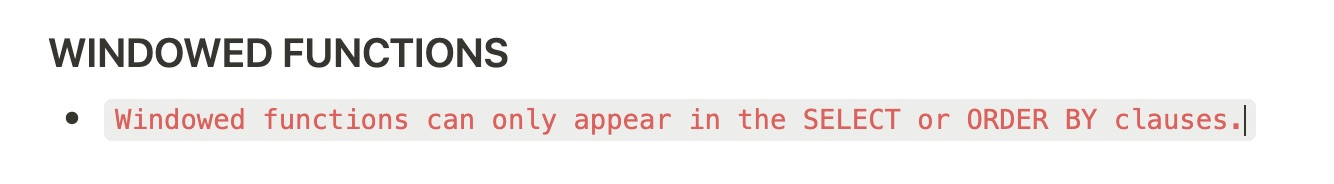